#### Visualizaciones del dataset

Se analizará el dataset utilizando visualizaciones de las librerías `pandas`, `numpy`, `matplotlib` y `seaborn`

In [19]:
# Importar archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

df = pd.read_csv('../data/shopping_trends_updated.csv')


Segmentación por género de los clientes

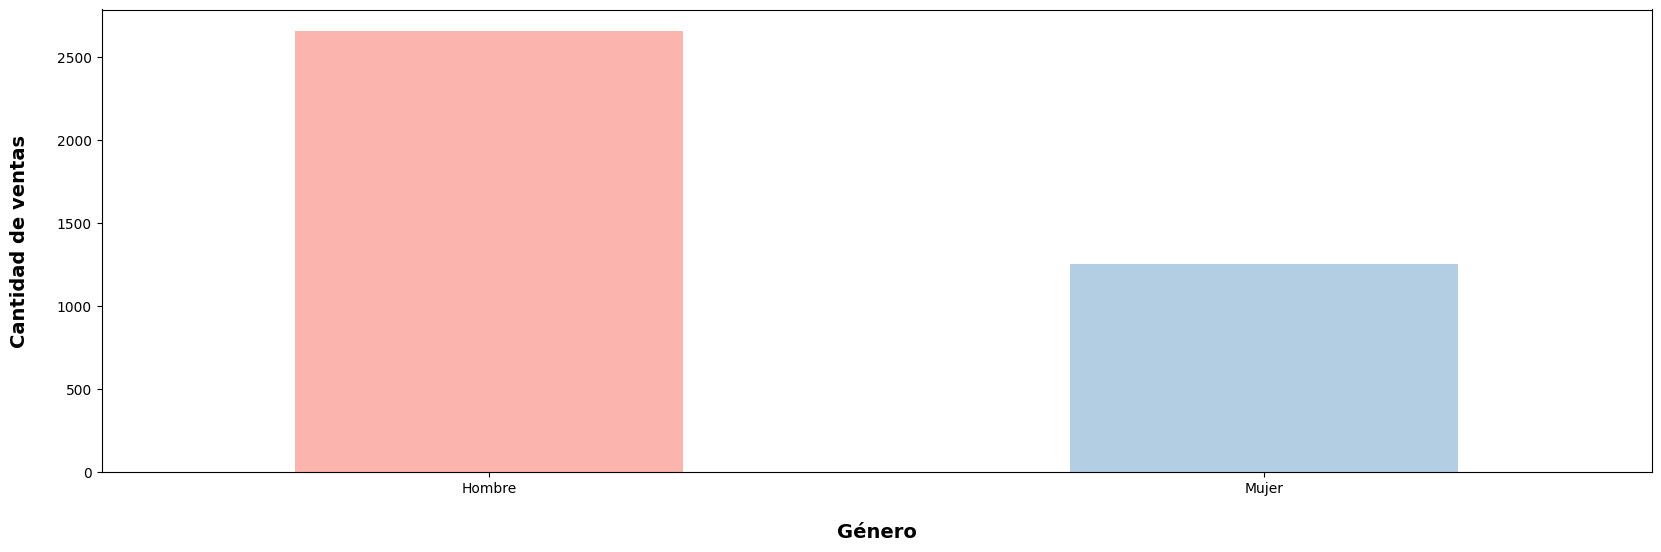

In [35]:
# Se define la paleta de colores
palette = plt.colormaps['Pastel1']    # Se utiliza la paleta Pastel de la documentación de matplotlib
colors = palette(range(len(df['Gender'].value_counts()))) # Se obtiene una lista de colores para cada categoría en la columna 'Gender'

# Se crea el gráfico de barras
plt.figure(figsize = (20, 6)) # Se configura el tamaño de la figura del gráfico
ax = df["Gender"].value_counts().plot(kind = 'bar', color=colors, rot = 0) # Se creaa un gráfico de barras con los colores definidos y sin rotación en las etiquetas del eje x
ax.set_xticklabels(('Hombre', 'Mujer')) # Se cambia las etiquetas del eje x a 'Hombre' y 'Mujer'

# Se configura las etiquetas de los ejes
plt.xlabel('Género', weight = "bold", color = "k", fontsize = 14, labelpad = 20)
plt.ylabel('Cantidad de ventas', weight = "bold", color = "k", fontsize = 14, labelpad = 20)
plt.show()

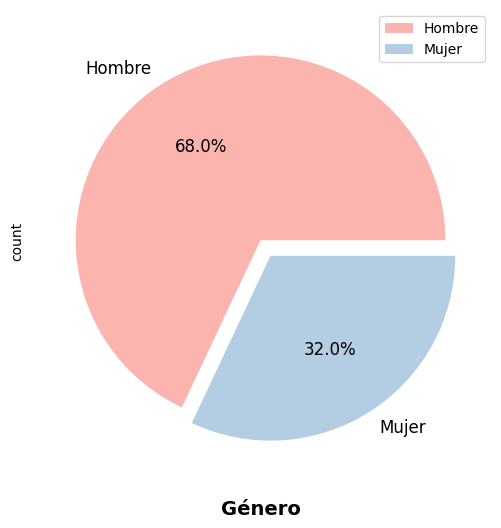

In [51]:
# Gráfico de torta

plt.figure(figsize = (20, 6)) # Se configura el tamaño

counts = df["Gender"].value_counts() # Se cuenta las cantidades de hombre y mujeres

# Se crea el gráfico de torta con etiquetas de % y con efecto de separacion entre los grupos 
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0,0.1), autopct = '%1.1f%%', labels=['Hombre', 'Mujer'])
plt.xlabel('Género', weight = "bold", color = "k", fontsize = 14, labelpad = 20) # Se configura la etiqueta del eje x
plt.legend(labels=['Hombre', 'Mujer'], loc='best') # Se configura la leyenda basada en el orden de 'counts.index'
plt.show()

Se observa que el 68% de los clientes son hombres.

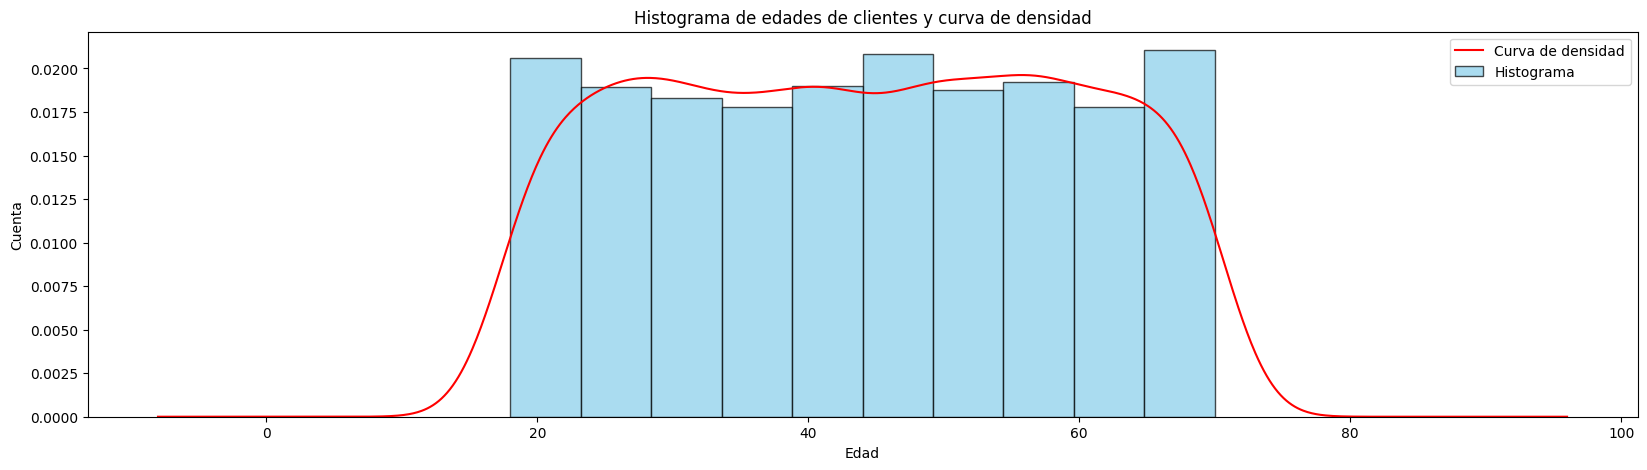

In [57]:
# Histograma de edades de clientes

fig, ax = plt.subplots(figsize = (20, 5)) # Se crea la figura y un eje para graficar

# Creación del histograma por edades 
ax.hist(df['Age'], bins = 10, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True) 
df['Age'].plot(kind = 'kde', color = 'red', ax = ax) # Se agrega la curva de densidad sobre el histograma

# Se configra las etiquetas, el título y la leyenda del gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Cuenta')
ax.set_title('Histograma de edades de clientes y curva de densidad')
ax.legend(['Curva de densidad', 'Histograma'])
plt.show()

Se observa en el histograma que las edades de los clientes van desde 18 a 70 años, sin que ningún grupo etáreo destaque por sobre otro (curva de densidad plana). 